

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Author: Bo Yan</p>

# DSE 260A

# Table of Content

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
import re
import seaborn as sns
import nltk
from math import sqrt
from math import pi
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn import metrics
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from kneed import KneeLocator, DataGenerator
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from wordcloud import WordCloud

%matplotlib inline

# Step 1: Load Datasets

In [2]:
covid19_confirmed_global = pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
print("\nShape of DataFrame:\n", covid19_confirmed_global.shape)


Shape of DataFrame:
 (284, 762)


In [4]:
print("\nHead of DataFrame:\n", covid19_confirmed_global.head())


Head of DataFrame:
   Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/8/22  2/9/22  2/10/22  2/11/22  \
0        0        0        0        0  ...  167739  168550   169448   169940   
1        0        0        0        0  ...  265716  266416   267020   267020   
2        0        0        0        0  ...  259088  259673   260191   260723   
3        0        0        0        0  ...   36808   36989    37074    37140   
4        0        0        0        0  ...   98424   98453    98474    98501   

   2/12/22  2/13/22  2/14/22  2/15/22  2/16/22  2/17/

In [5]:
covid19_confirmed_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 762 entries, Province/State to 2/17/22
dtypes: float64(2), int64(758), object(2)
memory usage: 1.7+ MB


# Step 2: Explore the datasets

In this step, we will explore what is present in the data and how the data is organized and determine what common features allow you to merge the datasets.  

We will answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

We will use the _matplotlib_ library to visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your datasets?

## Data Quality Issues and Data Cleaning

### Identify data quality issues and do data cleaning.

* Find column with most missing values

In [6]:
for col in covid19_confirmed_global:
    print(col, len(covid19_confirmed_global[covid19_confirmed_global[col].isnull()]))

Province/State 195
Country/Region 0
Lat 2
Long 2
1/22/20 0
1/23/20 0
1/24/20 0
1/25/20 0
1/26/20 0
1/27/20 0
1/28/20 0
1/29/20 0
1/30/20 0
1/31/20 0
2/1/20 0
2/2/20 0
2/3/20 0
2/4/20 0
2/5/20 0
2/6/20 0
2/7/20 0
2/8/20 0
2/9/20 0
2/10/20 0
2/11/20 0
2/12/20 0
2/13/20 0
2/14/20 0
2/15/20 0
2/16/20 0
2/17/20 0
2/18/20 0
2/19/20 0
2/20/20 0
2/21/20 0
2/22/20 0
2/23/20 0
2/24/20 0
2/25/20 0
2/26/20 0
2/27/20 0
2/28/20 0
2/29/20 0
3/1/20 0
3/2/20 0
3/3/20 0
3/4/20 0
3/5/20 0
3/6/20 0
3/7/20 0
3/8/20 0
3/9/20 0
3/10/20 0
3/11/20 0
3/12/20 0
3/13/20 0
3/14/20 0
3/15/20 0
3/16/20 0
3/17/20 0
3/18/20 0
3/19/20 0
3/20/20 0
3/21/20 0
3/22/20 0
3/23/20 0
3/24/20 0
3/25/20 0
3/26/20 0
3/27/20 0
3/28/20 0
3/29/20 0
3/30/20 0
3/31/20 0
4/1/20 0
4/2/20 0
4/3/20 0
4/4/20 0
4/5/20 0
4/6/20 0
4/7/20 0
4/8/20 0
4/9/20 0
4/10/20 0
4/11/20 0
4/12/20 0
4/13/20 0
4/14/20 0
4/15/20 0
4/16/20 0
4/17/20 0
4/18/20 0
4/19/20 0
4/20/20 0
4/21/20 0
4/22/20 0
4/23/20 0
4/24/20 0
4/25/20 0
4/26/20 0
4/27/20 0
4/28/20 

* Drop unused columns

In [7]:
# covid19_confirmed_global = covid19_confirmed_global.drop(["registration", "typecode"], axis = 1)
covid19_confirmed_global.shape

(284, 762)

* Drop any rows with NaN

In [8]:
covid19_confirmed_global = covid19_confirmed_global.dropna(axis = 0)
covid19_confirmed_global.shape

(87, 762)

* Drop duplicated rows

In [9]:
covid19_confirmed_global = covid19_confirmed_global.drop_duplicates()

covid19_confirmed_global.shape

(87, 762)

* Convert DateTime to Date

In [10]:
# for item in covid19_confirmed_global.day:
#     covid19_confirmed_global.day = item.replace(" 00:00:00+00:00", "")

In [11]:
covid19_confirmed_global.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22
9,Australian Capital Territory,Australia,-35.4735,149.0124,0,0,0,0,0,0,...,39613,40113,40538,40946,41380,41755,42163,42720,43246,43768
10,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,1164346,1174476,1183196,1191283,1197969,1197772,1212157,1222461,1232370,1241579
11,Northern Territory,Australia,-12.4634,130.8456,0,0,0,0,0,0,...,25612,25612,26767,29230,29989,29815,30582,31639,33606,33563
12,Queensland,Australia,-27.4698,153.0251,0,0,0,0,0,0,...,469663,475517,484186,487846,495157,498907,504193,507793,513387,519061
13,South Australia,Australia,-34.9285,138.6007,0,0,0,0,0,0,...,133569,118448,121532,121701,124424,125451,126708,126811,129943,129943


### Conclusions

Through exploring the data, there are several data qualities issues that needs to be cleaned.
1. Missing values (drop)
2. Duplicated rows if any (drop)
3. Unused columns (drop)
4. Data type (convert DateTime to Date)

## Data Distribution

Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

Approximately symmetric distribution: If the skewness value is between −½ and +½.

### Skew distribution

In [12]:
print(covid19_confirmed_global.skew())

Lat       -0.819657
Long      -0.280081
1/22/20    9.249738
1/23/20    9.141766
1/24/20    8.958625
             ...   
2/13/22    3.679619
2/14/22    3.683374
2/15/22    3.688784
2/16/22    3.678852
2/17/22    3.682160
Length: 760, dtype: float64


array([[<AxesSubplot:title={'center':'Lat'}>,
        <AxesSubplot:title={'center':'Long'}>,
        <AxesSubplot:title={'center':'1/22/20'}>,
        <AxesSubplot:title={'center':'1/23/20'}>,
        <AxesSubplot:title={'center':'1/24/20'}>,
        <AxesSubplot:title={'center':'1/25/20'}>,
        <AxesSubplot:title={'center':'1/26/20'}>,
        <AxesSubplot:title={'center':'1/27/20'}>,
        <AxesSubplot:title={'center':'1/28/20'}>,
        <AxesSubplot:title={'center':'1/29/20'}>,
        <AxesSubplot:title={'center':'1/30/20'}>,
        <AxesSubplot:title={'center':'1/31/20'}>,
        <AxesSubplot:title={'center':'2/1/20'}>,
        <AxesSubplot:title={'center':'2/2/20'}>,
        <AxesSubplot:title={'center':'2/3/20'}>,
        <AxesSubplot:title={'center':'2/4/20'}>,
        <AxesSubplot:title={'center':'2/5/20'}>,
        <AxesSubplot:title={'center':'2/6/20'}>,
        <AxesSubplot:title={'center':'2/7/20'}>,
        <AxesSubplot:title={'center':'2/8/20'}>,
        <AxesSu

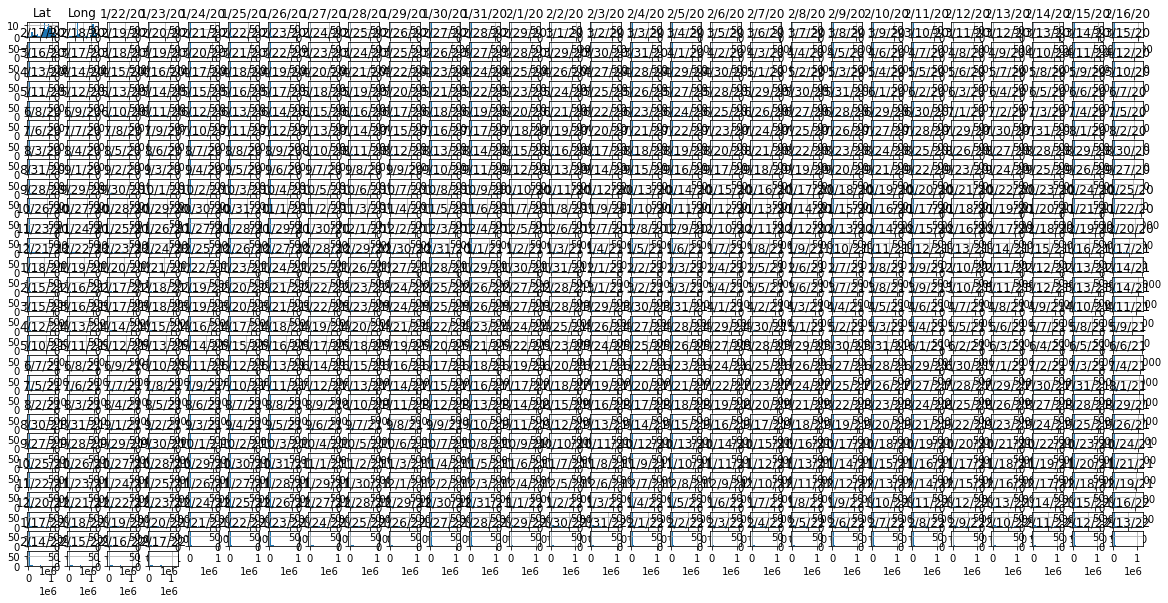

In [13]:
covid19_confirmed_global.hist(figsize = (20,10), bins = 20)

### Outlines

<AxesSubplot:>

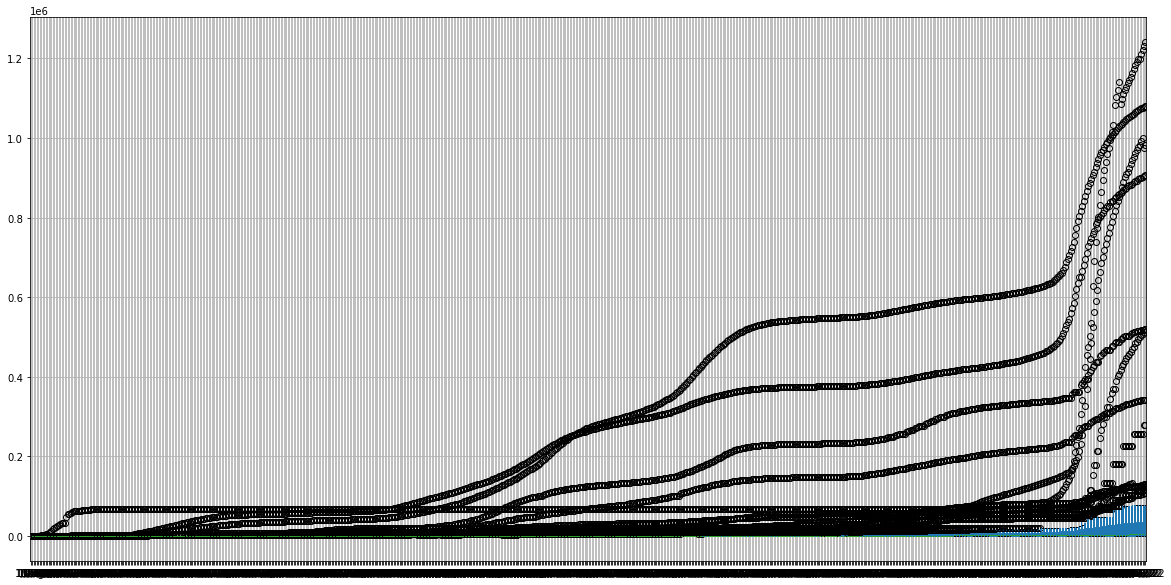

In [14]:
covid19_confirmed_global.boxplot(figsize = (20,10))

### Conclusions

1. Moderately skewed distribution: Lat.

2. Approximately symmetric distribution: Long.

3. Highly skewed distribution: date columns.

## Common Trends

### Geolocation trends

In [17]:
print(covid19_confirmed_global['Lat'].describe())

count    87.000000
mean     23.457646
std      28.510017
min     -51.796300
25%      13.581300
50%      30.057200
75%      43.879800
max      71.706900
Name: Lat, dtype: float64


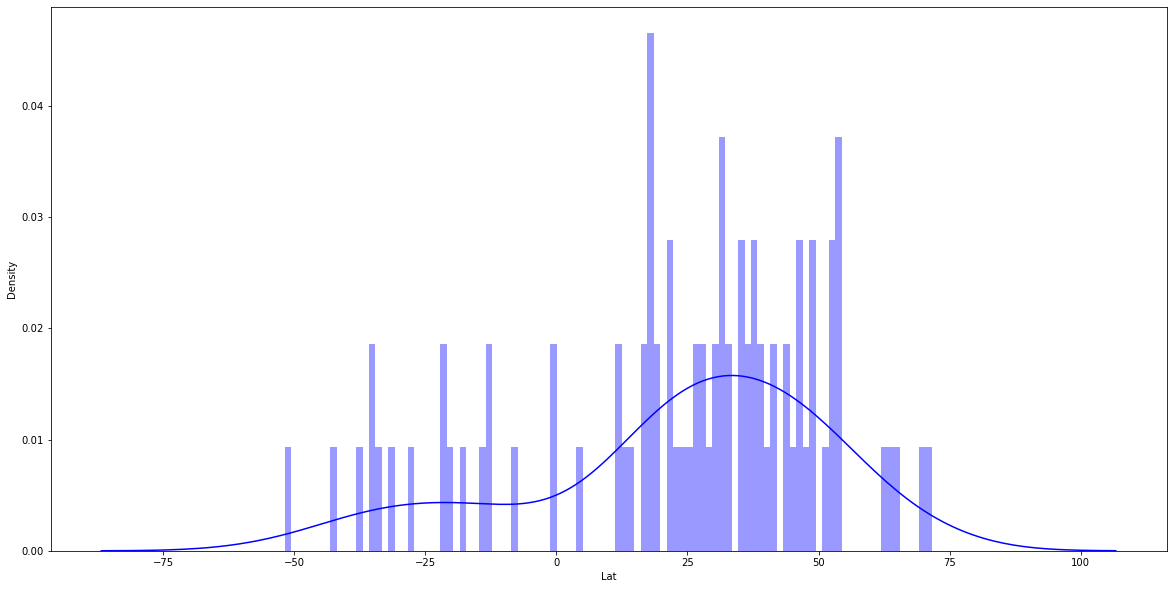

In [18]:
plt.figure(figsize = (20, 10))
sns.distplot(covid19_confirmed_global["Lat"], color='b', bins=100, hist_kws={'alpha': 0.4});

In [19]:
print(covid19_confirmed_global['Long'].describe())

count     87.000000
mean      28.951484
std       96.989444
min     -178.116500
25%      -63.061700
50%       55.536400
75%      115.791300
max      165.618042
Name: Long, dtype: float64


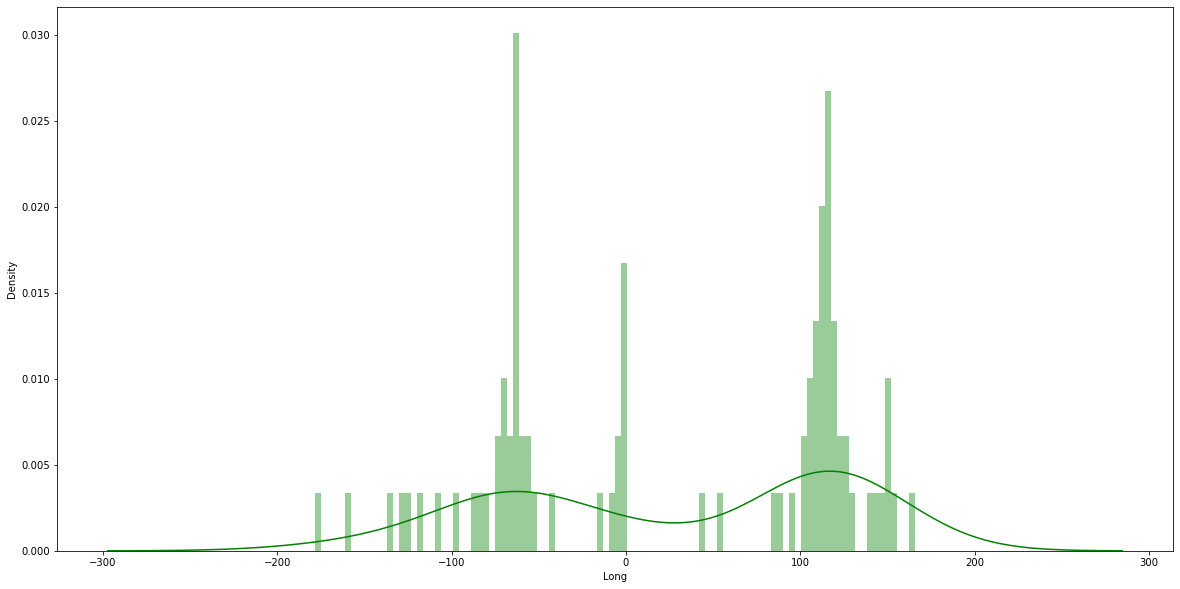

In [20]:
plt.figure(figsize=(20, 10))
sns.distplot(covid19_confirmed_global['Long'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [21]:
print(covid19_confirmed_global['Country/Region'].describe())

count        87
unique        8
top       China
freq         33
Name: Country/Region, dtype: object


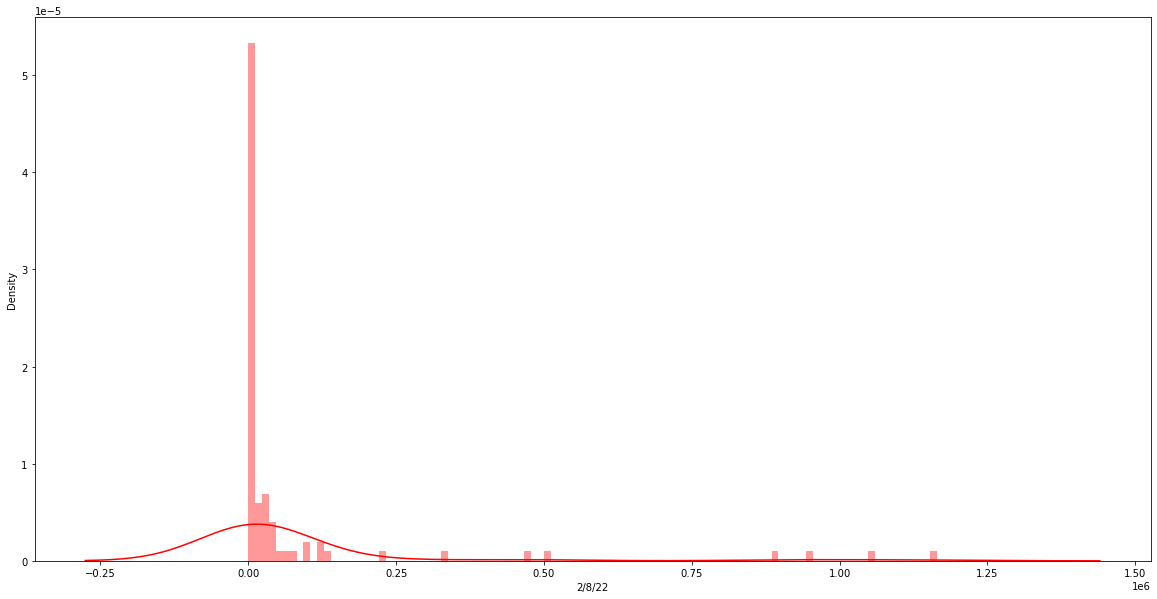

In [23]:
plt.figure(figsize=(20, 10))
sns.distplot(covid19_confirmed_global['2/8/22'], color='r', bins=100, hist_kws={'alpha': 0.4});

### Conclusions

1. Most of the Lat are in the altitude of 0.0.

2. Most of the Long belongs to -100 to 150.

## Variable Relationships

Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

Low degree: When the value lies below + .29, then it is said to be a small correlation.

No correlation: When the value is zero.

### Heatmap and scatter

<AxesSubplot:>

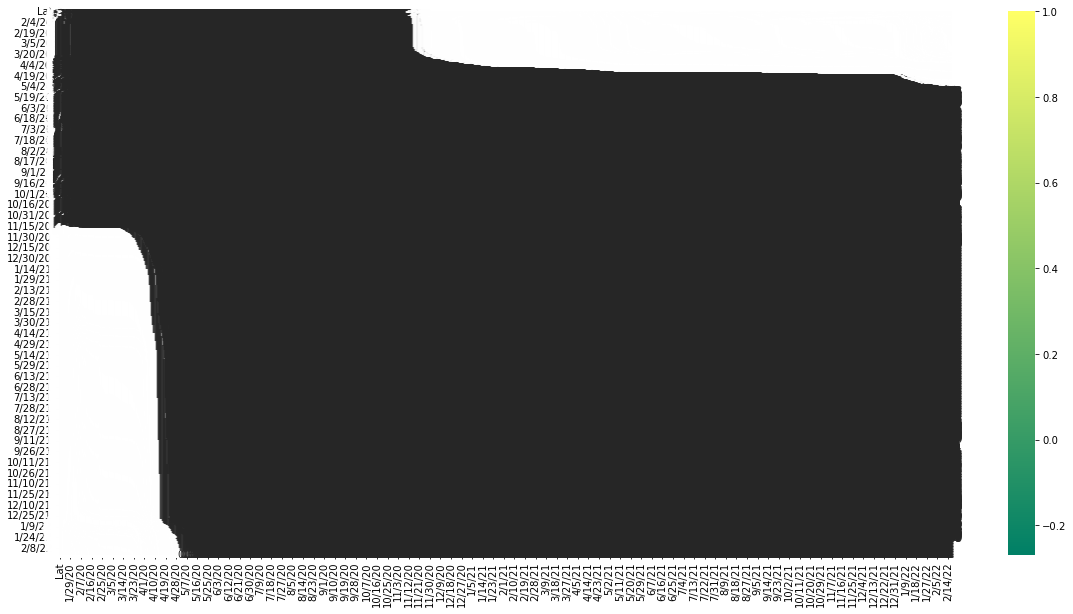

In [25]:
sns.heatmap(covid19_confirmed_global.corr(),annot = True,cmap = "summer")

In [ ]:
plt.figure(figsize = (15,10))
plt.scatter(x = covid19_confirmed_global['Lat'], y = covid19_confirmed_global['Long'])
plt.title('Lat vs. Long')
plt.xlabel('Lat')
plt.ylabel('Long')
plt.show()

### Conclusions

1. The relationship between latitude_1 and latitude_2 is positively strong correlation.

2. The relationship between longtitude_1 and longtitude_2 is positively strong correlation.

3. The relationship between altitude_1 and altitude_2 is positively small correlation.

4. The relationship between longtitude_1 and latitude_1, altitude_1, longtitude_2, altitude_2 are negatively small correlation.

5. The relationship between latitude_1 and longtitude_1, altitude_1, longtitude_2, altitude_2 are negatively small correlation.


# Step 3: Feature Engineering

## Binning Continuous Features